In [2]:
# -*- coding: utf-8 -*-
"""
Logistic Regression Demo
Created on Tue Feb 26 13:49:07 2019
@author: DELL
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Hàm sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Đọc dữ liệu
data = pd.read_csv('dataset.csv').values
N, d = data.shape
x = data[:, 0:d-1].reshape(-1, d-1)
y = data[:, 2].reshape(-1, 1)

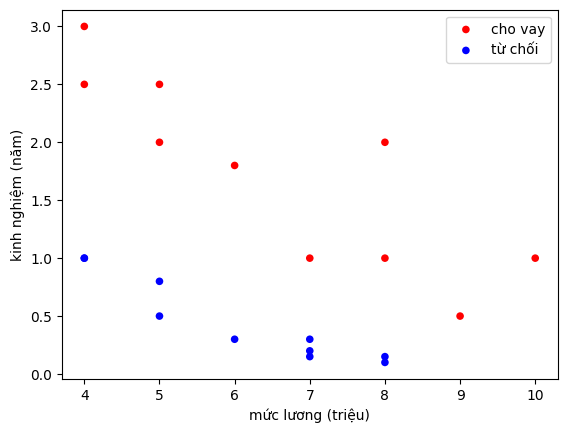

In [3]:
# Vẽ scatter phân loại
x_cho_vay = x[y[:,0] == 1]
x_tu_choi = x[y[:,0] == 0]

plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1],
            c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x_tu_choi[:, 0], x_tu_choi[:, 1],
            c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')
plt.show()

In [4]:
# Thêm cột 1 vào X cho bias
x = np.hstack((np.ones((N, 1)), x))

# Khởi tạo trọng số
w = np.array([0., 0.1, 0.1]).reshape(-1, 1)

numOfIteration = 1000
cost = np.zeros((numOfIteration, 1))
learning_rate = 0.01

In [5]:
for i in range(1, numOfIteration):
    y_predict = sigmoid(np.dot(x, w))
    cost[i] = -np.sum(y * np.log(y_predict) +
                      (1 - y) * np.log(1 - y_predict))
    w -= learning_rate * np.dot(x.T, (y_predict - y))
    if i % 100 == 0:
        print(f"Iteration {i}, cost: {cost[i][0]}")

Iteration 100, cost: 8.231701745840459
Iteration 200, cost: 6.917412105740891
Iteration 300, cost: 5.9606241895919965
Iteration 400, cost: 5.234196186536788
Iteration 500, cost: 4.668159902539224
Iteration 600, cost: 4.216476313134961
Iteration 700, cost: 3.848303237394389
Iteration 800, cost: 3.5425959972904795
Iteration 900, cost: 3.284673012330418


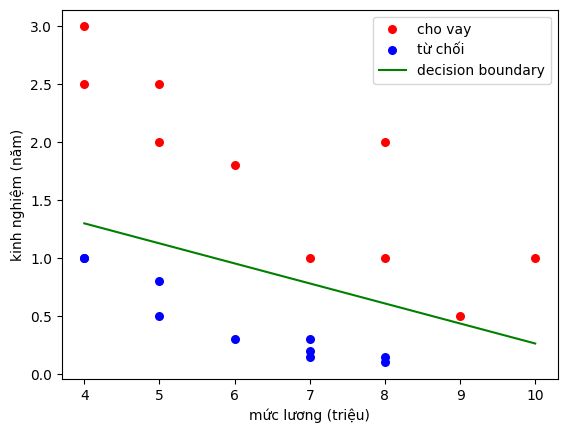

In [6]:
t = 0.5  # ngưỡng phân loại
plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1], c='red', s=30, label='cho vay')
plt.scatter(x_tu_choi[:, 0], x_tu_choi[:, 1], c='blue', s=30, label='từ chối')

# Đường quyết định: w0 + w1*x1 + w2*x2 + log(1/t -1) = 0
x1_vals = np.array([4, 10])
x2_vals = -(w[0] + w[1] * x1_vals + np.log(1/t - 1)) / w[2]
plt.plot(x1_vals, x2_vals, 'g', label='decision boundary')

plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')
plt.legend()
plt.show()
